### Pandas Homework Assignment IV
39 points

Due by Midnight April 17, 2024


**To avoid erasing the sample output, please insert a new cell above the sample output**. Write your script inside the new cell and run. Verify your output with the sample output

For lab submission, please rename your file using the following format

`firstname_familyname_Pandas_HW4.ipynb`

GroupLens Research provides a number of collections of movie ratings data collected from users of MovieLens in the late 1990s and early 2000s. The data provide movie ratings, movie metaadata (genres and year) and demographic data about the users. Such data is often of interest in the development of recommendation systems based on machine leraning algorithms. The MovieLens 1M dataset contains 1 million ratings collected from 6000 users on 4000 movies. It is spread across three tables: ratings, user information and movie information
    
- Age is chosen from the following ranges: 
	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"

- Occupation is chosen from the following choices:
	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"

In [ ]:
# please enter your name and 700# in this cell
print("Akhilandeswari Vegi")
print("700758173")



### Task 0
+ Import numpy as np
+ Import pandas as pd

In [1]:
import numpy as np
import pandas as pd

### Task 1
Load the rating.txt dataset into Pandas as a DataFrame. Please name the four columns as `UserID`, `MovieID`, `Rating` and `Timestamp`. Display the first five rows of the DataFrame

In [3]:
rating = pd.read_table('ratings.txt', sep = '::',header=None, engine = 'python')
rating.columns = ['UserID','MovieID','Rating','Timestamp']
rating.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


### Task 2
Load the users.txt dataset into Pandas as a DataFrame. Please name the five columns as `UserID`, `Gender`, `Age`, `Occupation` and `Zip Code`. Display the last five rows of the DataFrame

In [4]:
user = pd.read_table('users.txt', sep = '::', header = None, engine='python')
user.columns = ['UserID','Gender','Age','Occupation','Zip Code']
user.tail()

,UserID,Gender,Age,Occupation,Zip Code
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060
6039,6040,M,25,6,11106


### Task 3
For the DataFrame obtained from Task 2, convert column `UserID` into row index

In [5]:
convert = user.set_index('UserID')
convert.head()

,Gender,Age,Occupation,Zip Code
UserID,,,,
1,F,1,10,48067
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,02460
5,M,25,20,55455


### Task 4
Reconstruct the `Age` column in the DataFrame obtained from Task 3 by using the age map shown in the lab instructions

In [6]:
agemap = convert.copy() 
agemap['Age'] = agemap['Age'].map({1: "Under 18",18: "18-24",25: "25-34",35: "35-44",45: "45-49",
                                 50: "50-55",56: "56+",np.nan:'NY'},na_action=None)
agemap.head()

,Gender,Age,Occupation,Zip Code
UserID,,,,
1,F,Under 18,10,48067
2,M,56+,16,70072
3,M,25-34,15,55117
4,M,45-49,7,02460
5,M,25-34,20,55455


### Task 5
Reconstruct the `Occupation` column in the DataFrame obtained from Task 4 by using the occupation map shown in the lab instructions

In [7]:
occupationmap = agemap.copy()
occupationmap['Occupation'] = agemap['Occupation'].map({0: "other" or not specified,1: "academic/educator",2: "artist",3: "clerical/admin",4: "college/grad student",
           5: "customer service",6: "doctor/health care",7: "executive/managerial",8: "farmer",9: "homemaker",10: "K-12 student",
           11: "lawyer",12: "programmer",13: "retired",14: "sales/marketing",15: "scientist",16: "self-employed",
           17: "technician/engineer",18: "tradesman/craftsman",19: "unemployed",20: "writer",np.nan:'NY'},
                                              na_action=None)
occupationmap.head()

,Gender,Age,Occupation,Zip Code
UserID,,,,
1,F,Under 18,K-12 student,48067
2,M,56+,self-employed,70072
3,M,25-34,scientist,55117
4,M,45-49,executive/managerial,02460
5,M,25-34,writer,55455


### Task 6
Merge the Ratings table obtained from Task 1 and the Users table from Task 5 together using the `outer` merge

In [8]:
outermerge = pd.merge(rating, occupationmap, on='UserID', how='outer')
outermerge.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip Code
0,1,1193,5,978300760,F,Under 18,K-12 student,48067
1,1,661,3,978302109,F,Under 18,K-12 student,48067
2,1,914,3,978301968,F,Under 18,K-12 student,48067
3,1,3408,4,978300275,F,Under 18,K-12 student,48067
4,1,2355,5,978824291,F,Under 18,K-12 student,48067


### Task 7
Load the movies.txt dataset into Pandas as a DataFrame. Please name the three columns as `MovieID`, `Title` and `Genres`. Display the first three rows of the DataFrame

In [10]:
movies= pd.read_table('movies.txt', sep="::",header=None,engine = 'python')
movies.columns = ["MovieID", "Title", "Genres"]
movies.head(3)

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


### Task 8
Merge the the table from Task 6 and the Movies table obtained from Task 7 together using the `outer` merge

In [11]:
mergeTables = pd.merge(outermerge, movies, on='MovieID', how='outer')
mergeTables.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip Code,Title,Genres
0,1.0,1193,5.0,978300760.0,F,Under 18,K-12 student,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2.0,1193,5.0,978298413.0,M,56+,self-employed,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12.0,1193,4.0,978220179.0,M,25-34,programmer,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15.0,1193,4.0,978199279.0,M,25-34,executive/managerial,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17.0,1193,5.0,978158471.0,M,50-55,academic/educator,95350,One Flew Over the Cuckoo's Nest (1975),Drama


### Task 9
Check the DataFrame obatined from Task 8 to identify any duplicated rows

In [12]:
len(mergeTables[mergeTables.duplicated(keep= False)])

0

### Task 10
Check the DataFrame obtained from Task 8 to identify columns with missing values

In [13]:
mergeTables.isnull().any()

UserID         True
MovieID       False
Rating         True
Timestamp      True
Gender         True
Age            True
Occupation     True
Zip Code       True
Title         False
Genres        False
dtype: bool

### Task 11
Drop rows with missing values and verify that no column has missing values.

In [14]:
mergeTables.dropna(axis = 0).isnull().any()

UserID        False
MovieID       False
Rating        False
Timestamp     False
Gender        False
Age           False
Occupation    False
Zip Code      False
Title         False
Genres        False
dtype: bool

### Task 12
Find the gender distribution of the dataset obtained from Task 11

In [15]:
mergeTables['Gender'].value_counts()

M    753769
F    246440
Name: Gender, dtype: int64

### Task 13
Plot the bar graph for the age distribution of the dataset obtained from Task 11

<AxesSubplot:>

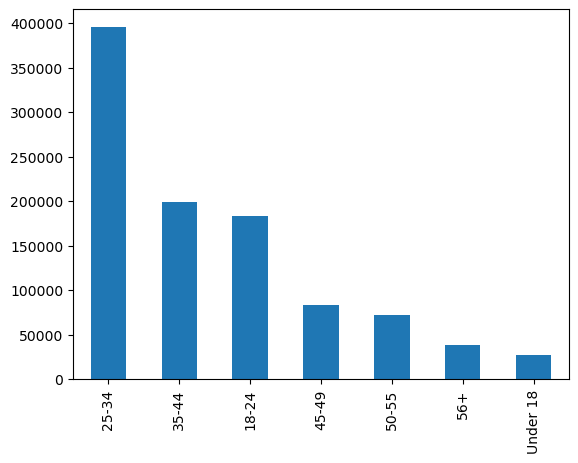

In [16]:
%matplotlib inline
mergeTables['Age'].value_counts().plot.bar()

### Task 14
Find the total number of ratings grouped by `Title` for each movie. Display the first five results

In [17]:
totalRatings = mergeTables.groupby(['Title'])['Rating'].size().groupby(level=0).max()
totalRatings.name=None
totalRatings.head()

Title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

### Task 15
Use the `filter` function to filter out those titles which have less than 100 ratings. Display the number of records remained in the dataset

In [18]:
def filter_func(x):
    return x['Rating'].count() >= 100
filterOut = mergeTables.groupby('Title').filter(filter_func)
filterOut.count()['Title']

942225

### Task 16
Using the dataframe obtained from Task 15, what are the top five rated movies by male

In [19]:
topFiveRated = filterOut.copy()
topFiveRated = topFiveRated[topFiveRated['Gender']=='M'].groupby('Title').agg('mean')['Rating']
topFiveRated.sort_values(ascending=False).head()

Title
Godfather, The (1972)                                                  4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)    4.576628
Shawshank Redemption, The (1994)                                       4.560625
Raiders of the Lost Ark (1981)                                         4.520597
Usual Suspects, The (1995)                                             4.518248
Name: Rating, dtype: float64

### Task 17
Using the dataframe obtained from Task 15, what are the bottom five rated movies by female

In [23]:
bottomFR = filterOut.copy()
bottomFR = bottomFR[bottomFR['Gender']=='F'].groupby('Title').agg('mean')['Rating']
bottomFR.sort_values(ascending=True).head()

Title
Aces: Iron Eagle III (1992)                       1.090909
Friday the 13th Part V: A New Beginning (1985)    1.272727
Kazaam (1996)                                     1.444444
Friday the 13th Part VI: Jason Lives (1986)       1.500000
Battlefield Earth (2000)                          1.574468
Name: Rating, dtype: float64

### Task 18
Using the dataframe obtained from Task 15, what are the top 5 rated movies overall

In [20]:
topFive = filterOut.copy()
topFive = topFive.groupby('Title').agg('mean')['Rating']
topFive.sort_values(ascending=False).head()

Title
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)    4.560510
Shawshank Redemption, The (1994)                                       4.554558
Godfather, The (1972)                                                  4.524966
Close Shave, A (1995)                                                  4.520548
Usual Suspects, The (1995)                                             4.517106
Name: Rating, dtype: float64

### Task 19
Find the average movie ratings grouped by ages for each movie

In [21]:
averageRatings = filterOut.copy()
averageRatings = averageRatings.groupby(['Title','Age'])["Rating"].mean()
averageRatings = averageRatings.unstack()
averageRatings

Age,18-24,25-34,35-44,45-49,50-55,56+,Under 18
Title,,,,,,,
"'burbs, The (1989)",3.244444,2.652174,2.818182,2.545455,3.208333,2.666667,4.500000
...And Justice for All (1979),3.428571,3.724138,3.657143,4.100000,3.551724,3.928571,3.000000
10 Things I Hate About You (1999),3.415020,3.432950,3.102941,3.258065,3.629630,4.000000,3.745455
101 Dalmatians (1961),3.295082,3.613757,3.826087,3.976744,3.650000,3.190476,3.514286
101 Dalmatians (1996),2.467742,2.928571,3.279570,3.482759,3.400000,3.555556,3.088235
...,...,...,...,...,...,...,...
Young Guns II (1990),3.121212,2.911111,2.765957,2.444444,2.400000,2.714286,3.666667
Young Sherlock Holmes (1985),3.629630,3.448485,3.257143,3.125000,3.297297,3.388889,3.000000
Your Friends and Neighbors (1998),3.516129,3.296296,3.400000,2.750000,3.000000,4.000000,4.000000


### Task 20
Find the top 10 rated movies by age 18-24

In [22]:
topTenRated = averageRatings.copy()
topTenRated = topTenRated.sort_values(by=[ "18-24"],ascending=False)
topTenRated.loc[ : , '18-24' ].head(10)

Title
They Shoot Horses, Don't They? (1969)                                  5.000000
Palm Beach Story, The (1942)                                           4.833333
How Green Was My Valley (1941)                                         4.750000
Usual Suspects, The (1995)                                             4.680798
Shawshank Redemption, The (1994)                                       4.674569
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)    4.604938
Close Shave, A (1995)                                                  4.568000
Life Is Beautiful (La Vita è bella) (1997)                             4.549180
American Beauty (1999)                                                 4.521678
Charade (1963)                                                         4.520000
Name: 18-24, dtype: float64

### Task 21
Find the top 10 rated moives by college students

In [23]:
topTen = filterOut.copy()
topTen = topTen.groupby(['Title','Occupation'])["Rating"].mean()
topTen = topTen.unstack()
topTen = topTen.sort_values(by=[ "college/grad student"],ascending=False)
topTen.loc[ : , 'college/grad student' ].head(10)

Title
They Shoot Horses, Don't They? (1969)            4.750000
Shawshank Redemption, The (1994)                 4.683582
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)    4.675676
Usual Suspects, The (1995)                       4.649123
Close Shave, A (1995)                            4.595506
Palm Beach Story, The (1942)                     4.571429
War Room, The (1993)                             4.562500
Godfather, The (1972)                            4.556364
It Happened One Night (1934)                     4.545455
Paths of Glory (1957)                            4.526316
Name: college/grad student, dtype: float64

### Task 22
Suppose you wanted to find the movies that are most divisive between male and female viewers. We first construct a pivot table to calcuate the average rating for each movie title between male and female by using the dataframe obtained from Task 15

In [24]:
pivotTable = filterOut.copy()
pivotTable = pd.pivot_table(pivotTable, values='Rating', index='Title',columns=['Gender'], aggfunc=np.average)
pivotTable.head()

Gender,F,M
Title,,
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215


### Task 23
Add a column `diff` to the dataframe obtained from the previous task containing the difference in mean ratings between male and female

In [33]:
addColumn = pivotTable.copy()
addColumn['diff'] = addColumn['M'] - addColumn['F']
addColumn.head()

Gender,F,M,diff
Title,,,
"'burbs, The (1989)",2.793478,2.962085,0.168607
...And Justice for All (1979),3.828571,3.689024,-0.139547
10 Things I Hate About You (1999),3.646552,3.311966,-0.334586
101 Dalmatians (1961),3.791444,3.500000,-0.291444
101 Dalmatians (1996),3.240000,2.911215,-0.328785


### Task 24
Find the top 10 movie titles which have the highest different ratings between female and male

In [38]:
#topTenDifferent = addColumn.copy()
#topTenDifferent = topTenDifferent.sort_values(by='diff')
#topTenDifferent.head(10)

topTenDifferent = addColumn.copy()
topTenDifferent = topTenDifferent.sort_values(by='diff')
topTenDifferent.head(10)
##topTenDifferent.head(10)

Gender,F,M,diff
Title,,,
Pet Sematary II (1992),2.833333,1.858696,-0.974638
Cutthroat Island (1995),3.200000,2.341270,-0.858730
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Air Bud (1997),3.057143,2.233766,-0.823377
Home Alone 3 (1997),2.486486,1.683761,-0.802726
"To Wong Foo, Thanks for Everything! Julie Newmar (1995)",3.486842,2.795276,-0.691567
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Orlando (1993),3.862745,3.190476,-0.672269
Spy Hard (1996),3.125000,2.472527,-0.652473


### Task 25
Find the top 10 movie titles which have the highest different ratings between male and female

In [41]:
topTenTitles = addColumn.copy()
topTenTitles = topTenTitles.sort_values(by='diff',ascending=False)
topTenTitles.head(10)

Gender,F,M,diff
Title,,,
Friday the 13th Part V: A New Beginning (1985),1.272727,2.165049,0.892321
Friday the 13th Part VI: Jason Lives (1986),1.500000,2.291667,0.791667
Lifeforce (1985),2.250000,2.994152,0.744152
Marked for Death (1990),2.100000,2.837607,0.737607
Quest for Fire (1981),2.578947,3.309677,0.730730
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
No Escape (1994),2.300000,2.994048,0.694048
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Your Friends and Neighbors (1998),2.888889,3.536585,0.647696


### Task 26
Suppose instead you wanted the movies that received the most disagreement among viewers, indenendent of gender identification. Disagreement can be measured by the variance or standard deviation of the ratings

In [42]:
varianceRating = filterOut.copy()
varianceRating = varianceRating.groupby(['Title']).std().sort_values(by='Rating',ascending=False)['Rating']
varianceRating.head(10)

Title
Plan 9 from Outer Space (1958)                    1.455998
Beloved (1998)                                    1.372813
Godzilla 2000 (Gojira ni-sen mireniamu) (1999)    1.364700
Texas Chainsaw Massacre, The (1974)               1.332448
Dumb & Dumber (1994)                              1.321333
Crash (1996)                                      1.319636
Blair Witch Project, The (1999)                   1.316368
Natural Born Killers (1994)                       1.307198
Down to You (2000)                                1.305310
Cemetery Man (Dellamorte Dellamore) (1994)        1.300647
Name: Rating, dtype: float64

### Task 27
Find the number of ratings from Zip Code 64093 (Warrensburg, MO)

In [43]:
ZipRating = filterOut.copy()
ZipRating[ZipRating["Zip Code"]=='64093'].count()['Rating']

595

### Task 28
Find the number of ratings from Zip Code with format 640XX (X represents a digit)

In [44]:
zipFormatRating = filterOut.copy()
zipFormatRating[zipFormatRating['Zip Code'].str.match('640')]['Rating'].count()

1740

### Task 29
Normalization is a very important data pre-processing step. The formula is 

$X_{normalized} = \frac{X - X_{minimum}}{X_{maximum} - X_{minimum}}$


Conduct the normalization on the `Rating` column on the DataFrame obtained in Task 1 groupped by `UserID` and add a new column `Rating Norm`

In [45]:
normalization = rating.copy()
normalization['Rating Norm'] = normalization.groupby('UserID')['Rating'].transform(lambda x: (x-x.min())/(x.max()-x.min()))
normalization.head()

,UserID,MovieID,Rating,Timestamp,Rating Norm
0,1,1193,5,978300760,1.0
1,1,661,3,978302109,0.0
2,1,914,3,978301968,0.0
3,1,3408,4,978300275,0.5
4,1,2355,5,978824291,1.0


### Task 30
Find the first five records of `UserID = 3` from the dataframe obtained from Task 29

In [46]:
firstFive = normalization.copy()
firstFive[firstFive['UserID'] == 3].head()

,UserID,MovieID,Rating,Timestamp,Rating Norm
182,3,3421,4,978298147,0.75
183,3,1641,2,978298430,0.25
184,3,648,3,978297867,0.50
185,3,1394,4,978298147,0.75
186,3,3534,3,978297068,0.50


### Task 31
Add a new column `Date` to DataFrame from Task 1 by converting the `TimeStamp` column into a datetime object. Note the unit in the `Timestamp` is second

In [47]:
dateColumn = rating.copy()
dateColumn['Date'] = pd.to_datetime(dateColumn['Timestamp'],unit='s')
dateColumn.head()

,UserID,MovieID,Rating,Timestamp,Date
0,1,1193,5,978300760,2000-12-31 22:12:40
1,1,661,3,978302109,2000-12-31 22:35:09
2,1,914,3,978301968,2000-12-31 22:32:48
3,1,3408,4,978300275,2000-12-31 22:04:35
4,1,2355,5,978824291,2001-01-06 23:38:11


### Task 32
Find the count of `MovieID` groupped by month and ratings

In [48]:
countMovieID = dateColumn.copy()
countMovieID = countMovieID.groupby([countMovieID['Date'].dt.month,'Rating'])['MovieID'].count()
countMovieID.head(10)

Date  Rating
1     1         1127
      2         2608
      3         6442
      4         8400
      5         4495
2     1          629
      2         1464
      3         3297
      4         4403
      5         2335
Name: MovieID, dtype: int64

### Task 33
Convert the Series from Task 32 into a DataFrame shown below

In [49]:
convertSeries = countMovieID.copy()
convertSeries = convertSeries.unstack()
convertSeries

Rating,1,2,3,4,5
Date,,,,,
1,1127,2608,6442,8400,4495
2,629,1464,3297,4403,2335
3,466,1077,2523,3032,1439
4,1048,2247,5501,6748,3863
5,4557,7631,18481,25769,17840
6,3196,6500,15211,21838,14365
7,4891,9566,25421,34957,22169
8,10873,20597,50509,64198,42497
9,3107,5873,14702,19927,13182


### Task 34
Plot the line graph using the dataframe obtained from Task 33

<AxesSubplot:xlabel='Date'>

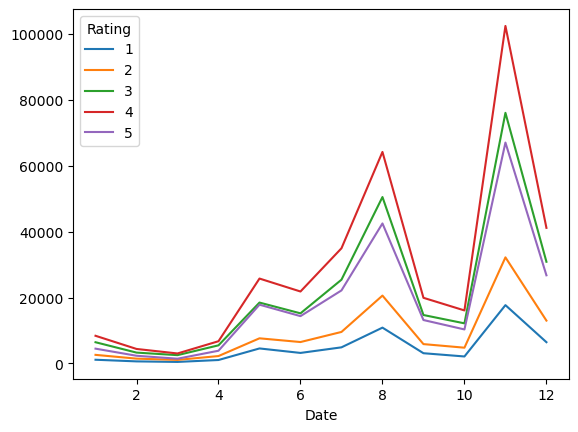

In [50]:
convertSeries.plot.line()

### Task 35
Add a new column `Genre` into the DataFrame obtained from Task 7 by splitting the genres into a list. Drop the `Genres` column afterwards

In [51]:
genreColumn = movies.copy()
genreColumn['Genre'] =genreColumn['Genres'].str.split('|')
genreColumn.drop("Genres", axis=1, inplace=True)
genreColumn.head()

,MovieID,Title,Genre
0,1,Toy Story (1995),"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),[Comedy]


### Task 36
Reconstruct the `Genre` column from Task 35 so that only one genre per row. Hint, use the `explode` method

In [52]:
reconstruct = genreColumn.copy()
reconstruct = reconstruct.explode('Genre')
reconstruct.head()

,MovieID,Title,Genre
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children's
0,1,Toy Story (1995),Comedy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children's


### Task 37
Find the top 5 movie genres in all movie titles

In [53]:
reconstruct['Genre'].value_counts().head()

Drama       1603
Comedy      1200
Action       503
Thriller     492
Romance      471
Name: Genre, dtype: int64

### Task 38
Plot a bar graph showing the total numbers for each genre

<AxesSubplot:>

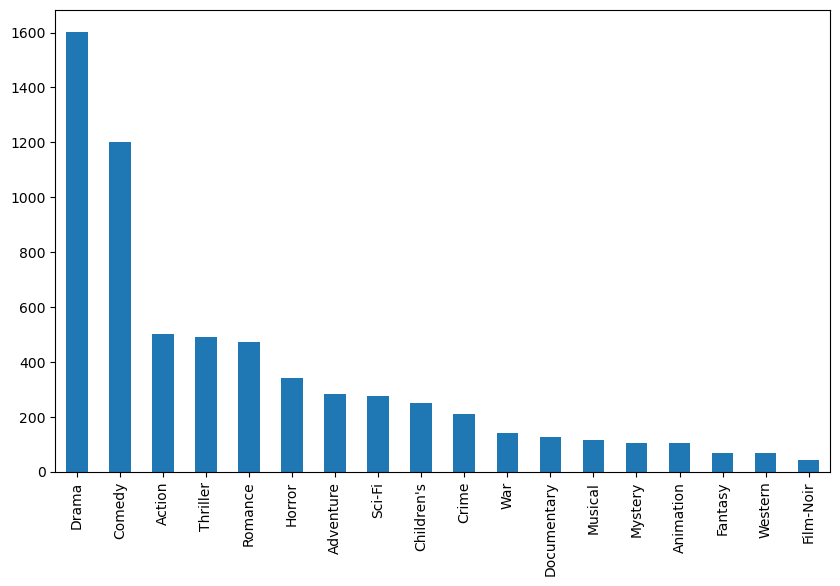

In [54]:
reconstruct['Genre'].value_counts().plot.bar(figsize=(10, 6))

### Task 39
What are the top 5 rated Genre

In [55]:
topFiveGenre = reconstruct.copy()
topFiveGenre = topFiveGenre.merge(rating, how ='outer', on='MovieID')
topFiveGenre.groupby('Genre').agg('mean')['Rating'].sort_values(ascending=False).head()

Genre
Film-Noir      4.075188
Documentary    3.933123
War            3.893327
Drama          3.766332
Crime          3.708679
Name: Rating, dtype: float64